# import package

In [0]:
import pandas as pd
import numpy as np
# from sklearn import cross_validation
from sklearn.datasets import load_iris
# train_test_split的作用是 把数据集分解成训练数据集，测试数据集
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import csv

# K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# SVM
from sklearn.svm import SVC

## Connect Google Drive.
## This must be authorized by your Google account.
## Please note the ***file path***！

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Big Data"

os.chdir(path)
os.listdir(path)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['test.csv', 'train.csv', 'five.png.csv']

In [0]:
# Load MNIST training data
# 运行MNIST训练数据
train = pd.read_csv("train.csv")

# Pre-process MNIST data and split it into train, test data sets
# 预处理MNIST数据并将其分为 训练数据集，测试数据集
features = train.columns[1:]
X = train[features]
y = train['label']

# test_size=0.3是分解比例，分别是训练集70%和测试集30%, 如果是整数的话就是样本的数量
# random_state=0 ，决策树由于前面数据集的分解是随机的,导致由于每次生成的树都是不一样的，所以用这个参数保证每次产生的树一致
X_train, X_test, y_train, y_test = train_test_split(X / 255., y, test_size=0.2, random_state=0)

# **RandomForest**
## 10-Fold CV
### Tuning Parameter *max_depth*

best_score: 0.933931
best_max_depth 10
best_score: 0.934464
best_max_depth 18
best_score: 0.951876
best_max_depth 20
best_score: 0.952441
best_max_depth 24
best_score: 0.952471
best_max_depth 46


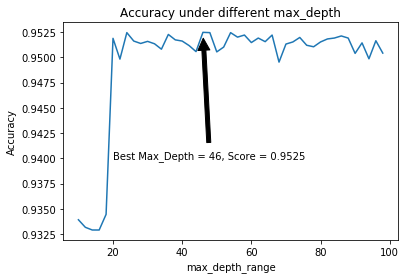

Random Forest accuracy（set n_estimators=100）: 0.962619


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
# K-fold
cv_scores = []		#用来放每个模型的结果值
max_depth_range = range(10,100,2)
best_score = 0
best_max_depth = 10

for n in max_depth_range:
  RFC = RandomForestClassifier(n_estimators = 20,max_depth = best_max_depth)
  scores = cross_val_score(RFC,X_train,y_train,cv=10, scoring='accuracy')  #cv：选择每次测试折数,这里我选择了10-fold  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
  cv_scores.append(scores.mean())

  if (scores.mean() > best_score).all():
    best_score = scores.mean()
    best_max_depth = n
    print("best_score: %f" %best_score)
    print("best_max_depth %d" %best_max_depth)
    
# 绘图
plt.plot(max_depth_range,cv_scores,label='n_estimators=20')
plt.title('Accuracy under different max_depth')
plt.xlabel('max_depth_range')
plt.ylabel('Accuracy')		#通过图像选择最好的参数

plt.annotate('Best Max_Depth = ' + str(best_max_depth) + ', Score = '+ str(round(best_score,4)), xy=(best_max_depth, best_score), xytext=(20,0.94), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Train the Random Forest classifier. Fit the train data
# 训练随机森林分类器。 拟合训练的数据
clf_rf = RandomForestClassifier(n_estimators = 100, max_depth = best_max_depth)
# 选择最优的K，进行重新训练模型
best_Kfold = cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy')
clf_rf.fit(X_train, y_train)




# Predict the handwritten digits in the test data
# 预测测试数据中的手写数字
y_pred_rf = clf_rf.predict(X_test)


# Measure accuracy of the prediction
# Measure accuracy of the prediction
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy（set n_estimators=100）: %f" % acc_rf)

# Now use the whole train set to predict the test set
clf_rf = RandomForestClassifier()
clf_rf.fit(X, y)

#Verify the trained model

In [7]:
# Predict the test data in 'test.csv' file
# TestFile="test.csv"
# 预测“test.csv”文件中的 测试数据
# TestFile = “test.csv”
TestFile = "test.csv"
test = pd.read_csv(TestFile)
y_pred_rf = clf_rf.predict(test)
print(y_pred_rf)

[2 0 9 ... 3 9 2]


In [0]:
np.set_printoptions(linewidth=200)
with open(TestFile, 'r') as csv_file:
    for didx, data in enumerate(csv.reader(csv_file)):
        if "pixel" in data[0]: continue

        # label = data[0]
        label = y_pred_rf[didx - 1]

        # The rest of columns are pixels
        # 其余列为像素
        pixels = data

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        # 使这些列成为8位像素的数组
        # 该数组为一维数组，长度为784
        # 像素强度值是0到255之间的整数
        pixels = np.array(pixels, dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        # 将阵列重塑为28 x 28阵列（二维阵列
        pixels = pixels.reshape((28, 28))
        print(pixels)

        # Plot
        plt.title('Predicted as {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
